## Домашняя работа №2 (часть 2)

Перед тем как приступить к выполнению заданий, повторю часть кода из предыдущей части д/з.
1. Прочитаю файл
2. Токенизирую
3. Проанализирую с помощью пайморфи

In [1]:
with open('tragedy.txt', 'r', encoding='utf-8') as f:
    text = ' '.join(f.read().split('\n'))

In [2]:
import nltk
from nltk.tokenize import word_tokenize
words = [w for w in word_tokenize(text) if w.isalpha()]

In [3]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

analyzed = []
for word in words:
    analyzed.append(morph.parse(word))

#### Составление списка граммем
Чтобы составить список, я выбираю одно случайное слово с разбором. Собираю у него все названия атрибутов в tag, убираю оттуда лишние.

In [5]:
a = analyzed[101]
attributes = [x for x in dir(a[0].tag) if not x.startswith('_') and not callable(getattr(a[0].tag, x))]
attributes = list(filter(lambda x: not x[0].isupper() or x == 'POS', attributes))
attributes = list(filter(lambda x: 'grammemes' not in x, attributes))

['POS', 'animacy', 'aspect', 'case', 'cyr_repr', 'gender', 'involvement', 'mood', 'number', 'person', 'tense', 'transitivity', 'voice']


#### Составление словарей с граммемами каждого слова

In [6]:
name_list = []
for word in analyzed:
    word_attrs = {}
    word_attrs['word'] = word[0].word
    for attr in attributes:
        attr_data = getattr(word[0].tag, attr)
        if attr_data is not None:
            attr_data = str(attr_data)
        word_attrs[attr] = attr_data
    word_attrs['lemma'] = word[0].normal_form
    name_list.append(word_attrs)

#### Составление таблицы

In [7]:
import pandas as pd

tragedy_df = pd.DataFrame(name_list)

cols = tragedy_df.columns.tolist()
cols.remove('word')
cols.remove('lemma')
cols = ['word', 'lemma'] + cols
tragedy_df[cols].fillna('')

#### Графики с семинара
Далее будет составлено 3 графика, как на семинаре. 
1. Гистограма по роду
2. Боксплот по частотам частей речи
3. Облако слов без стоп-слов

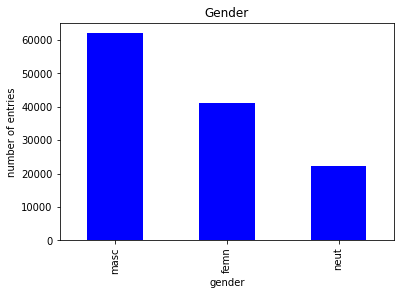

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
tragedy_df['gender'].value_counts().plot.bar(color='blue')
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

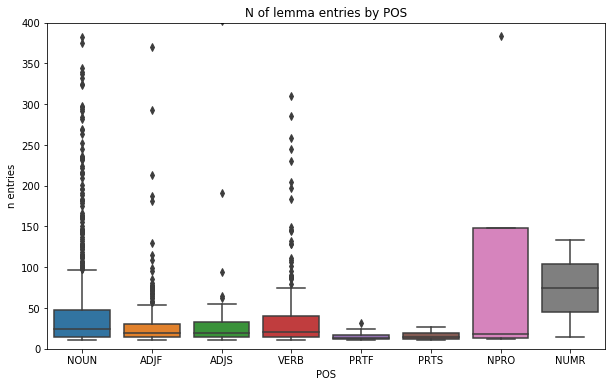

In [22]:
from nltk.corpus import stopwords

df2 = tragedy_df[['lemma', 'POS', 'gender']].groupby(['lemma', 'POS'], as_index=False).count()
df2.columns = ['lemma', 'POS', 'total']
df2 = df2[(df2['total'] > 10) & ~(df2['lemma'].isin(stopwords.words('russian')))]

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="POS", y="total", data=df2)
plt.ylim((0, 400))
plt.title('N of lemma entries by POS without stopwords')
plt.ylabel('n entries')
plt.xlabel('POS');

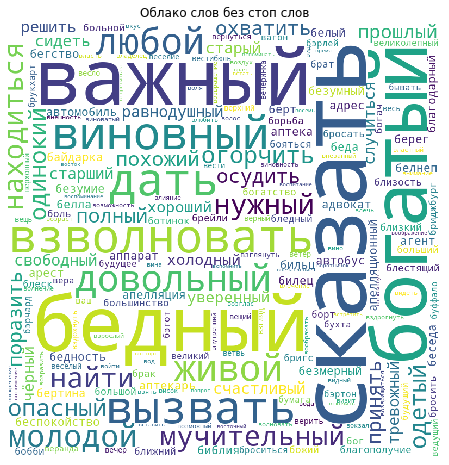

In [27]:
from wordcloud import WordCloud
text = ' '.join(df2['lemma'])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов без стоп слов')
plt.show()

#### Свои графики

Данный график отображает соотношение времен среди всех глаголов и причастий. Для демонстрации этих данных удобен именно этот вид графика, так как здесь присутствуют значения только одной граммемы. Также этих значений всего три.

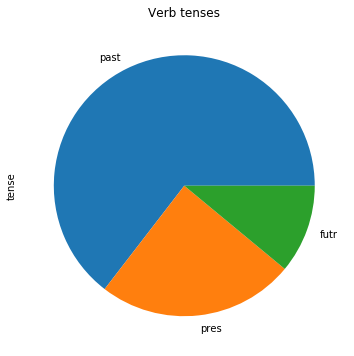

In [12]:
plt.figure(figsize=(6, 6))
tragedy_df['tense'].value_counts().plot(kind='pie');
plt.title('Tenses');

Следующий график показывает распределение падежей по частям речи. Такой график использован, потому что отображаются только значения только одного атрибута (падежа), но присутсвуют несколько частей речи, у которых есть категория падежа и их всех стоит отразить. 

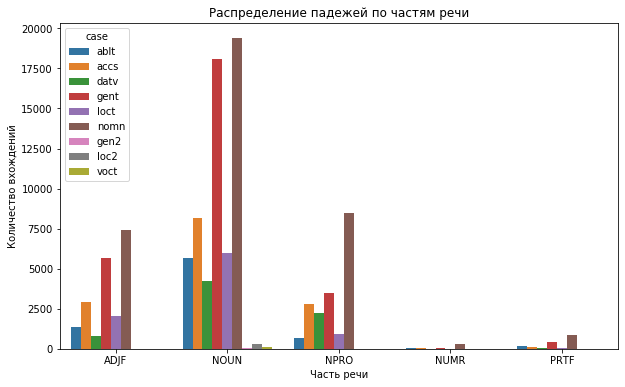

In [48]:
df2 = tragedy_df[['POS', 'case', 'gender']].groupby(['POS', 'case'], as_index=False).count()

plt.figure(figsize=(10, 6))
df2.columns = ['POS', 'case', 'total']
sns.barplot(x="POS", y="total", hue='case', data=df2)
plt.title('Распределение падежей по частям речи')
plt.xlabel('Часть речи')
plt.ylabel('Количество вхождений');

#### График распределения героев.

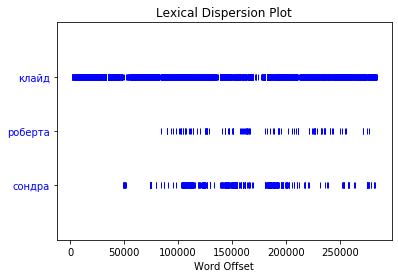

In [49]:
nltk.draw.dispersion.dispersion_plot(tragedy_df['lemma'], ['клайд', 'роберта', 'сондра'], )